In [1]:
import numpy as np
import pandas as pd
import seaborn as sb

In [2]:
# 한글깨짐 방지
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

In [3]:
# 모든 전처리 데이터 불러오기
# 호우발생정보, 기상정보, 인구정보, 고도정도, 경사도정보, 산사태취약지점정보
df_res_wea = pd.read_csv("data/rescue_weather_pp.csv")
df_pop = pd.read_csv("data/pop_pp.csv")
df_alt_full = pd.read_csv("data/altitude_full_pp.csv")
df_alt_avg = pd.read_csv("data/altitude_avg_pp.csv")
df_slope_full = pd.read_csv("data/slope_full_pp.csv")
df_slope_avg = pd.read_csv("data/slope_avg_pp.csv")
df_landslide = pd.read_csv("data/landslide_pp.csv")

In [4]:
# 출동데이터랑 인구데이터 merge
df_res_wea['year'] = df_res_wea['TIME'].apply(lambda x: pd.to_datetime(x)).dt.year
df_pop.rename(columns={'법정동명': 'EMD_NAME', '법정동코드': 'EMD_CD'}, inplace=True)

In [5]:
# 연도에 맞는 인구데이터 붙이기
df_full = pd.merge(df_res_wea, df_pop, how='left', on='EMD_CD')
for i in range(len(df_full)):
    df_full.loc[i, 'pop'] = df_full.loc[i, str(df_full.loc[i, 'year'])]

In [6]:
# 인구데이터 떼기
df_full.drop(columns=[str(i) for i in range(2014, 2024)] + ['EMD_NAME_y'], inplace=True)
df_full.rename(columns={'EMD_NAME_x': 'EMD_NAME'}, inplace=True)
df_full.head(3)

,EMD_CD,EMD_NAME,LON,LAT,TIME,TYPE,AVG_TEMP,MIN_TEMP,MAX_TEMP,DAY_PRE,MAX_WSPEED,AVG_WSPEED,LABEL,year,pop
0,44760310,충청남도 부여군 규암면,126.884171,36.275284,2014-08-25 07:29:00,호우주의보,23.2,21.9,25.5,34.0,5.6,1.2,0,2014,10366.0
1,44760420,충청남도 부여군 장암면,126.886455,36.243935,2014-08-25 10:00:00,호우주의보,23.2,21.9,25.5,34.0,5.6,1.2,0,2014,3120.0
2,44760350,충청남도 부여군 구룡면,126.812825,36.252592,2014-08-25 10:39:00,호우주의보,23.2,21.9,25.5,34.0,5.6,1.2,0,2014,2657.0


In [7]:
# 고도 데이터 및 경사 데이터 붙이기
df_full = pd.merge(df_full, df_alt_avg, how='left', on=['EMD_CD', 'EMD_NAME'])
df_full = pd.merge(df_full, df_slope_avg, how='left', on=['EMD_CD', 'EMD_NAME'])
df_full = pd.merge(df_full, df_alt_full, how='left', on=['EMD_CD', 'EMD_NAME'])
df_full = pd.merge(df_full, df_slope_full, how='left', on=['EMD_CD', 'EMD_NAME'])
df_full.head(3)

,EMD_CD,EMD_NAME,LON,LAT,TIME,TYPE,AVG_TEMP,MIN_TEMP,MAX_TEMP,DAY_PRE,...,600~700m,700~800m,800~900m,0~5deg,5~10deg,10~15deg,15~20deg,20~25deg,25~30deg,30~35deg
0,44760310,충청남도 부여군 규암면,126.884171,36.275284,2014-08-25 07:29:00,호우주의보,23.2,21.9,25.5,34.0,...,0.0,0.0,0.0,53.29,11.12,9.57,9.68,8.05,4.77,3.52
1,44760420,충청남도 부여군 장암면,126.886455,36.243935,2014-08-25 10:00:00,호우주의보,23.2,21.9,25.5,34.0,...,0.0,0.0,0.0,33.64,12.43,14.32,15.28,12.60,7.38,4.35
2,44760350,충청남도 부여군 구룡면,126.812825,36.252592,2014-08-25 10:39:00,호우주의보,23.2,21.9,25.5,34.0,...,0.0,0.0,0.0,50.22,13.89,11.29,9.44,7.06,4.23,3.87


In [8]:
# 고도 및 경사도 비율들은 전처리를 100으로 나누어 줌
pp_col = [
    '0~10m','10~50m','50~100m','100~200m','200~300m','300~400m','400~500m',
    '500~600m','600~700m','700~800m','800~900m',
    '0~5deg','5~10deg','10~15deg','15~20deg','20~25deg','25~30deg','30~35deg'
]

for col in pp_col:
    df_full[col] /= 100.

df_full.head(3)

,EMD_CD,EMD_NAME,LON,LAT,TIME,TYPE,AVG_TEMP,MIN_TEMP,MAX_TEMP,DAY_PRE,...,600~700m,700~800m,800~900m,0~5deg,5~10deg,10~15deg,15~20deg,20~25deg,25~30deg,30~35deg
0,44760310,충청남도 부여군 규암면,126.884171,36.275284,2014-08-25 07:29:00,호우주의보,23.2,21.9,25.5,34.0,...,0.0,0.0,0.0,0.5329,0.1112,0.0957,0.0968,0.0805,0.0477,0.0352
1,44760420,충청남도 부여군 장암면,126.886455,36.243935,2014-08-25 10:00:00,호우주의보,23.2,21.9,25.5,34.0,...,0.0,0.0,0.0,0.3364,0.1243,0.1432,0.1528,0.1260,0.0738,0.0435
2,44760350,충청남도 부여군 구룡면,126.812825,36.252592,2014-08-25 10:39:00,호우주의보,23.2,21.9,25.5,34.0,...,0.0,0.0,0.0,0.5022,0.1389,0.1129,0.0944,0.0706,0.0423,0.0387


In [9]:
# 산사태 취약지역 법정동별로 세기
df_land_count = pd.DataFrame(df_landslide.loc[:, ['법정동코드', '지정일']].groupby(['법정동코드']).count()).reset_index()
df_land_count.rename(columns={'법정동코드': 'EMD_CD', '지정일': 'landslide_cnt'}, inplace=True)
df_land_count.head(3)

,EMD_CD,landslide_cnt
0,44131250,1
1,44131320,2
2,44131330,3


In [10]:
# 기존 데이터와 merge
df_full = pd.merge(df_full, df_land_count, how='left', on='EMD_CD')

In [11]:
# 취약지역 없는 부분은 결측치로 표시되므로 0으로 채우기
df_full['landslide_cnt'].fillna(0., inplace=True)
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6597 entries, 0 to 6596
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   EMD_CD         6597 non-null   int64  
 1   EMD_NAME       6597 non-null   object 
 2   LON            6597 non-null   float64
 3   LAT            6597 non-null   float64
 4   TIME           6597 non-null   object 
 5   TYPE           6597 non-null   object 
 6   AVG_TEMP       6597 non-null   float64
 7   MIN_TEMP       6597 non-null   float64
 8   MAX_TEMP       6597 non-null   float64
 9   DAY_PRE        6597 non-null   float64
 10  MAX_WSPEED     6597 non-null   float64
 11  AVG_WSPEED     6597 non-null   float64
 12  LABEL          6597 non-null   int64  
 13  year           6597 non-null   int32  
 14  pop            6597 non-null   float64
 15  AVG_ALT        6597 non-null   float64
 16  AVG_SLOP       6597 non-null   float64
 17  0~10m          6597 non-null   float64
 18  10~50m  

In [12]:
# 미사용 컬럼 제거 및 이름 바꾸기
df_full.drop(columns=[
    'EMD_CD', 'EMD_NAME', 'TIME', 'TYPE', 'year'
], inplace=True)

df_full.rename(columns={
    'pop': 'POP',
    'landslide_cnt': 'LAND_CNT'
}, inplace=True)

cols = df_full.columns.tolist()
cols.remove('LABEL')
cols.remove('LAND_CNT')
df_full = df_full.loc[:, cols[:11] + ['LAND_CNT'] + cols[11:] + ['LABEL']]
df_full.head(3)

,LON,LAT,AVG_TEMP,MIN_TEMP,MAX_TEMP,DAY_PRE,MAX_WSPEED,AVG_WSPEED,POP,AVG_ALT,...,700~800m,800~900m,0~5deg,5~10deg,10~15deg,15~20deg,20~25deg,25~30deg,30~35deg,LABEL
0,126.884171,36.275284,23.2,21.9,25.5,34.0,5.6,1.2,10366.0,30.7625,...,0.0,0.0,0.5329,0.1112,0.0957,0.0968,0.0805,0.0477,0.0352,0
1,126.886455,36.243935,23.2,21.9,25.5,34.0,5.6,1.2,3120.0,49.5275,...,0.0,0.0,0.3364,0.1243,0.1432,0.1528,0.1260,0.0738,0.0435,0
2,126.812825,36.252592,23.2,21.9,25.5,34.0,5.6,1.2,2657.0,38.9295,...,0.0,0.0,0.5022,0.1389,0.1129,0.0944,0.0706,0.0423,0.0387,0


In [13]:
# 데이터 배열 형식으로 추가
data_X_need_scale = np.array(df_full.iloc[:, :12])
data_X_not_scale = np.array(df_full.iloc[:, 12:-1])
data_y = np.array(df_full.iloc[:, -1])

In [14]:
# 스케일 필요한 데이터만 스케일링
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(data_X_need_scale)
data_X_scaled = scaler.transform(data_X_need_scale)

In [15]:
# 스케일링 필요없는 데이터와 concat
data_X = np.concatenate([data_X_scaled, data_X_not_scale], axis=1)
print(data_X.shape, data_y.shape)

(6597, 30) (6597,)


<Axes: >

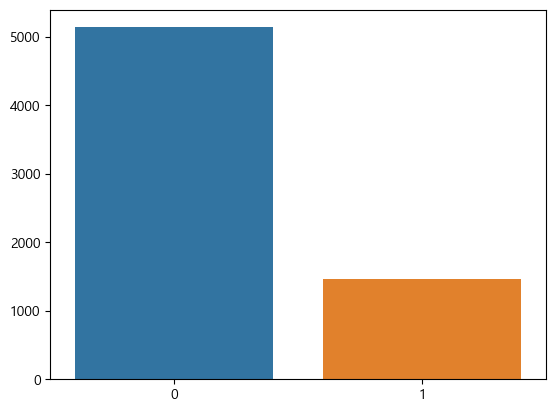

In [16]:
# 라벨 분포 확인
# 비울 상 오버/언더샘플링은 필요 없을 것으로 보임
label_dist = pd.DataFrame(data=data_y, columns=['LABEL']).value_counts().reset_index(drop=True)
sb.barplot(x=label_dist.index, y=label_dist.values)

<Axes: >

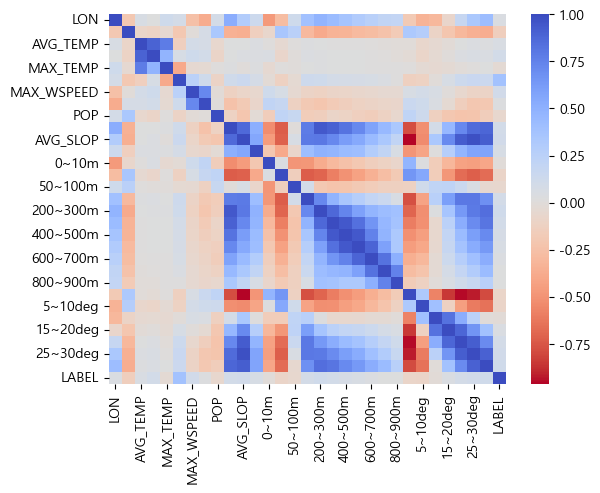

In [17]:
# 상관관계 분석
# 라벨과 각 피쳐 간 상관관계가 생각보다 크지 않음
df_scaled = pd.DataFrame(np.concatenate([data_X, data_y.reshape(-1, 1)], axis=1), columns=df_full.columns)
corr = df_scaled.corr()
sb.heatmap(corr, cmap='coolwarm_r')

In [18]:
# 일단 상관관계 계수가 0.05 미만이면 사용하지 않기로 조정
corr_cols = ['LON'] + corr['LABEL'][corr['LABEL'].apply(lambda x: abs(x) >= 0.05)].index.tolist()
corr_cols

['LON',
 'LAT',
 'AVG_TEMP',
 'MIN_TEMP',
 'DAY_PRE',
 'MAX_WSPEED',
 'POP',
 'AVG_ALT',
 'AVG_SLOP',
 'LAND_CNT',
 '10~50m',
 '50~100m',
 '100~200m',
 '200~300m',
 '300~400m',
 '400~500m',
 '500~600m',
 '0~5deg',
 '5~10deg',
 '20~25deg',
 '25~30deg',
 '30~35deg',
 'LABEL']

In [19]:
# 선별된 컬럼으로 데이터 구성
X_data = np.array(df_scaled.loc[:, corr_cols].iloc[:, :-1])
y_data = np.array(df_scaled.loc[:, corr_cols].iloc[:, -1])
print(X_data.shape, y_data.shape)

(6597, 22) (6597,)


## 학습 한 번 돌려보기

In [47]:
# 학습 및 테스트 데이터 스플릿
from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, test_size=0.2, random_state=121, stratify=y_data)

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

In [49]:
def get_clf_eval(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 score:", f1)
    print("ROC AUC score:", auc)

In [50]:
# 로지스틱 회귀
logistic_cls = LogisticRegression(random_state=121)
logistic_cls.fit(X_train, y_train)
y_pred = logistic_cls.predict(X_val)
print("LogisticRegression")
get_clf_eval(y_val, y_pred)

LogisticRegression
Accuracy: 0.803030303030303
Precision: 0.5963855421686747
Recall: 0.339041095890411
F1 score: 0.43231441048034935
ROC AUC score: 0.6369329993070733


In [51]:
# 랜덤포레스트
randomforest_cls = RandomForestClassifier(random_state=121)
randomforest_cls.fit(X_train, y_train)
y_pred = randomforest_cls.predict(X_val)
print("RandomForest")
get_clf_eval(y_val, y_pred)

RandomForest
Accuracy: 0.821969696969697
Precision: 0.6144578313253012
Recall: 0.523972602739726
F1 score: 0.5656192236598891
ROC AUC score: 0.715293694365972


In [52]:
# LightGBM
eval = [(X_val, y_val)]
lgbm_cls = LGBMClassifier(n_estimators=400)
lgbm_cls.fit(X_train, y_train, eval_metric='logloss', eval_set=eval)
y_pred = lgbm_cls.predict(X_val)
print("LightGBM")
get_clf_eval(y_val, y_pred)

LightGBM
Accuracy: 0.8265151515151515
Precision: 0.6307053941908713
Recall: 0.5205479452054794
F1 score: 0.5703564727954973
ROC AUC score: 0.716986034859549


In [53]:
# XGBoost
xgb_cls = XGBClassifier(n_estimators=500, learning_rate=0.2, max_depth=4, random_state = 32)
xgb_cls.fit(X_train, y_train)
y_pred = xgb_cls.predict(X_val)
print("XGBoost")
get_clf_eval(y_val, y_pred)

XGBoost
Accuracy: 0.8227272727272728
Precision: 0.6260869565217392
Recall: 0.4931506849315068
F1 score: 0.5517241379310345
ROC AUC score: 0.7047465486914343


## 모델별 하이퍼파라미터 튜닝

In [63]:
# 로지스틱 회귀
lr_params = {
    'penalty': ['l2'], 
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

lr_grid = GridSearchCV(LogisticRegression(max_iter=5000), lr_params, cv=5)
lr_grid.fit(X_train, y_train)
lr_best = lr_grid.best_estimator_

In [71]:
print('Logistic Regression Paramter:', lr_grid.best_params_)

Logistic Regression Paramter: {'C': 1, 'penalty': 'l2'}


In [64]:
lr_y_pred = lr_best.predict(X_val)
lr_acc = accuracy_score(lr_y_pred, y_val)
lr_precision = precision_score(lr_y_pred, y_val)
lr_recall = recall_score(lr_y_pred, y_val)
lr_f1 = f1_score(lr_y_pred, y_val)
lr_auc = roc_auc_score(lr_y_pred, y_val)
print("Logistic Regression")
print("Accuracy: {:.2f}".format(lr_acc))
print("Precision: {:.2f}".format(lr_precision))
print("Recall: {:.2f}".format(lr_recall))
print("F1 score: {:.2f}".format(lr_f1))
print("ROC AUC score: {:.2f}".format(lr_auc))

Logistic Regression
Accuracy: 0.80
Precision: 0.34
Recall: 0.60
F1 score: 0.43
ROC AUC score: 0.71


In [ ]:
# 랜덤 포레스트
rf_params = {
    'n_estimators' : [100, 200, 300], 
    'max_depth' : [4, 6, 8], 
    'min_samples_leaf' : [8, 12, 18, 20], 
    'min_samples_split' : [6, 8, 16]
}

rf_grid = GridSearchCV(RandomForestClassifier(), rf_params, cv=5)
rf_grid.fit(X_train, y_train)
rf_best = rf_grid.best_estimator_

In [68]:
# 최고성능 파라미터
print('Random Forest Paramter:', rf_grid.best_params_)

Random Forest Paramter: {'max_depth': 8, 'min_samples_leaf': 12, 'min_samples_split': 8, 'n_estimators': 200}


In [73]:
rf_y_pred = rf_best.predict(X_val)
rf_acc = accuracy_score(rf_y_pred, y_val)
rf_precision = precision_score(rf_y_pred, y_val)
rf_recall = recall_score(rf_y_pred, y_val)
rf_f1 = f1_score(rf_y_pred, y_val)
rf_auc = roc_auc_score(rf_y_pred, y_val)
print("Random Forest")
print("Accuracy: {:.2f}".format(rf_acc))
print("Precision: {:.2f}".format(rf_precision))
print("Recall: {:.2f}".format(rf_recall))
print("F1 score: {:.2f}".format(rf_f1))
print("ROC AUC score: {:.2f}".format(rf_auc))

Random Forest
Accuracy: 0.82
Precision: 0.33
Recall: 0.67
F1 score: 0.44
ROC AUC score: 0.75


In [74]:
# LightGBM
lgbm_params = {
    "learning_rate" : [0.01,0.1,0.2,0.3,0.4,0.5],
    "max_depth" : [25, 50, 75],
    "num_leaves" : [100,300,500,900,1200],
    "n_estimators" : [100, 200, 300,500,800,1000],
    "learning_rate" : [0.01,0.1,0.2,0.3,0.4,0.5]
}

lgbm_grid = GridSearchCV(LGBMClassifier(), lgbm_params, cv=5)
lgbm_grid.fit(X_train, y_train)
lgbm_best = lgbm_grid.best_estimator_

In [77]:
# 최고성능 파라미터
print('LightGBM Parameter:', lgbm_grid.best_params_)

LightGBM Parameter: {'learning_rate': 0.01, 'max_depth': 50, 'n_estimators': 200, 'num_leaves': 100}


In [78]:
lgbm_y_pred = lgbm_best.predict(X_val)
lgbm_acc = accuracy_score(lgbm_y_pred, y_val)
lgbm_precision = precision_score(lgbm_y_pred, y_val)
lgbm_recall = recall_score(lgbm_y_pred, y_val)
lgbm_f1 = f1_score(lgbm_y_pred, y_val)
lgbm_auc = roc_auc_score(lgbm_y_pred, y_val)
print("LightGBM")
print("Accuracy: {:.2f}".format(lgbm_acc))
print("Precision: {:.2f}".format(lgbm_precision))
print("Recall: {:.2f}".format(lgbm_recall))
print("F1 score: {:.2f}".format(lgbm_f1))
print("ROC AUC score: {:.2f}".format(lgbm_auc))

LightGBM
Accuracy: 0.82
Precision: 0.41
Recall: 0.64
F1 score: 0.50
ROC AUC score: 0.74


In [79]:
# XGBoost
xgb_params = {
    "max_depth": [10,30,50],
    "min_child_weight" : [1,3,6,10],
    "n_estimators": [200,300,500,1000]
} 

xgb_grid = GridSearchCV(XGBClassifier(), xgb_params, cv=5)
xgb_grid.fit(X_train, y_train)
xgb_best = xgb_grid.best_estimator_

In [82]:
# 최고성능 파라미터
print('XGBoost Parameter:', xgb_grid.best_params_)

XGBoost Parameter: {'max_depth': 30, 'min_child_weight': 1, 'n_estimators': 200}


In [81]:
xgb_y_pred = xgb_best.predict(X_val)
xgb_acc = accuracy_score(xgb_y_pred, y_val)
xgb_precision = precision_score(xgb_y_pred, y_val)
xgb_recall = recall_score(xgb_y_pred, y_val)
xgb_f1 = f1_score(xgb_y_pred, y_val)
xgb_auc = roc_auc_score(xgb_y_pred, y_val)
print("XGBoost")
print("Accuracy: {:.2f}".format(xgb_acc))
print("Precision: {:.2f}".format(xgb_precision))
print("Recall: {:.2f}".format(xgb_recall))
print("F1 score: {:.2f}".format(xgb_f1))
print("ROC AUC score: {:.2f}".format(xgb_auc))

XGBoost
Accuracy: 0.82
Precision: 0.52
Recall: 0.63
F1 score: 0.57
ROC AUC score: 0.75


In [102]:
# 학습 결과 정리
results = [
    ["LogisticRegression", lr_acc, lr_precision, lr_recall, lr_f1, lr_auc],
    ["RandomForest", rf_acc, rf_precision, rf_recall, rf_f1, rf_auc],
    ["LightGBM", lgbm_acc, lgbm_precision, lgbm_recall, lgbm_f1, lgbm_auc],
    ["XGBoost", xgb_acc, xgb_precision, xgb_recall, xgb_f1, xgb_auc]
]

df_results = pd.DataFrame(results, columns=['algorithm', 'accuracy', 'precision', 'recall','f1 score', 'roc auc score'])
df_results = df_results.transpose()
df_results = df_results.iloc[1:, :]
df_results.rename(columns={
    0: 'LogisticRegression',
    1: 'RandomForest',
    2: 'LightGBM',
    3: 'XGBoost',
}, inplace=True)

df_results

,LogisticRegression,RandomForest,LightGBM,XGBoost
accuracy,0.80303,0.815152,0.818182,0.825
precision,0.339041,0.325342,0.410959,0.517123
recall,0.596386,0.669014,0.638298,0.626556
f1 score,0.432314,0.437788,0.5,0.566604
roc auc score,0.714571,0.750891,0.743177,0.74794


<Axes: >

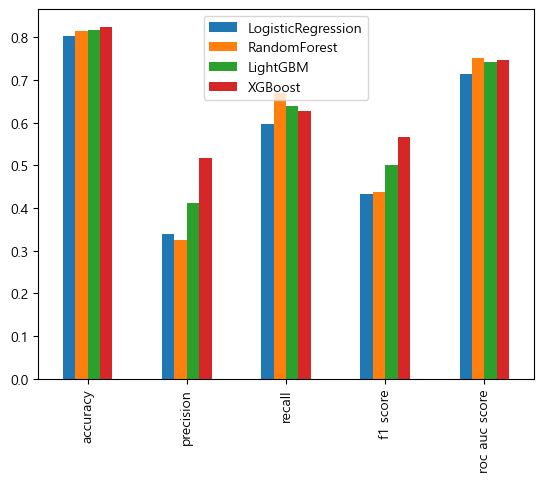

In [103]:
# 결과 비교 그래프
df_results.plot.bar()

In [104]:
# 학습된 모델들은 모두 저장
import joblib

joblib.dump(lr_best, 'models/lr_best.pkl')
joblib.dump(rf_best, 'models/rf_best.pkl')
joblib.dump(lgbm_best, 'models/lgbm_best.pkl')
joblib.dump(xgb_best, 'models/xgb_best.pkl')

['xgb_best.pkl']

## 해야할것
- XGBoost를 사용할 것임
- 호우동안 데이터 취합해서 평균도 내고 이런식으로 지역별 예측에 필요한 데이터 가공
- 가공 데이터 기반으로 각 지역별 출동 확률로 표시